In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
air = pd.read_csv('AirlinesCluster.csv')

In [3]:
air.head()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
0,28143,0,174,1,0,0,7000
1,19244,0,215,2,0,0,6968
2,41354,0,4123,4,0,0,7034
3,14776,0,500,1,0,0,6952
4,97752,0,43300,26,2077,4,6935


In [4]:
air.shape

(3999, 7)

In [5]:
air.describe()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
count,3.999000e+03,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000
mean,7.360133e+04,144.114529,17144.846212,11.60190,460.055764,1.373593,4118.55939
std,1.007757e+05,773.663804,24150.967826,9.60381,1400.209171,3.793172,2065.13454
min,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,2.00000
25%,1.852750e+04,0.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000
50%,4.309700e+04,0.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000
75%,9.240400e+04,0.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000
max,1.704838e+06,11148.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000


In [6]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
dat = pd.DataFrame(normalizer.fit_transform(air),
                   columns=air.columns)

C:\Users\rsloo\Anaconda3\envs\py35\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


In [7]:
dat.head()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
0,0.970414,0.0,0.006000,0.000034,0.000000,0.000000,0.241371
1,0.940209,0.0,0.010504,0.000098,0.000000,0.000000,0.340437
2,0.981113,0.0,0.097817,0.000095,0.000000,0.000000,0.166880
3,0.904428,0.0,0.030605,0.000061,0.000000,0.000000,0.425527
4,0.912226,0.0,0.404078,0.000243,0.019383,0.000037,0.064718


In [8]:
dat.describe()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,0.896759,0.002967,0.236466,0.000275,0.007905,0.000025,0.136356
std,0.172929,0.024981,0.244995,0.000379,0.028669,0.000115,0.172916
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001455
25%,0.887264,0.000000,0.037068,0.000067,0.000000,0.000000,0.036485
50%,0.967287,0.000000,0.153473,0.000162,0.000000,0.000000,0.071895
75%,0.992306,0.000000,0.371607,0.000326,0.003320,0.000013,0.156184
max,0.999995,0.707106,0.999039,0.005434,0.568473,0.005434,0.999854


In [10]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=3)

In [17]:
m = model.fit(dat)

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage
# plt.plot(dendrogram(linkage(dat)))

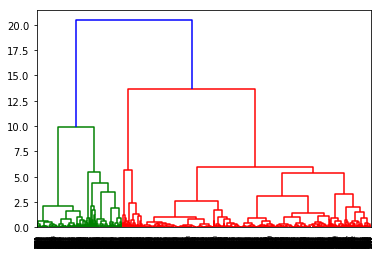

In [26]:
plt.figure()
Z = linkage(dat, method='ward')
dendrogram(Z)
plt.show()

In [29]:
model = AgglomerativeClustering(n_clusters=5).fit(dat)